In [11]:
import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
from tqdm import tqdm
import matplotlib.pyplot as plt
import csv
import pandas as pd


In [13]:
pat_id = '7114639'
data_dir = "/home/jjia/data/dataset/lung_function/ori_resolution"
itkskeleton = f"{data_dir}/SSc_patient_{pat_id}_skeleton.mha"
itk = load_itk(itkskeleton)


In [17]:

pcdskeleton = f"{data_dir}/SSc_patient_{pat_id}_skeleton_coordinates140000.pt"
pcd = pd.read_pickle(pcdskeleton)
print(pcd['data'].shape)

(140000, 4)


In [16]:
pcd

{'data': array([[524.        , 307.        , 322.        ,   1.96970582],
        [458.        , 245.        , 197.        ,   4.33120441],
        [594.        , 318.        , 309.        ,   2.20899653],
        ...,
        [336.        , 307.33333333, 368.        ,   1.19999695],
        [517.66666667, 297.66666667, 295.66666667,   2.04670668],
        [517.33333333, 297.33333333, 295.33333333,   1.8043592 ]]),
 'origin': array([1723.15000001, -199.60949999, -199.60949999]),
 'spacing': array([0.30000001, 0.78100002, 0.78100002])}

(249298944,)


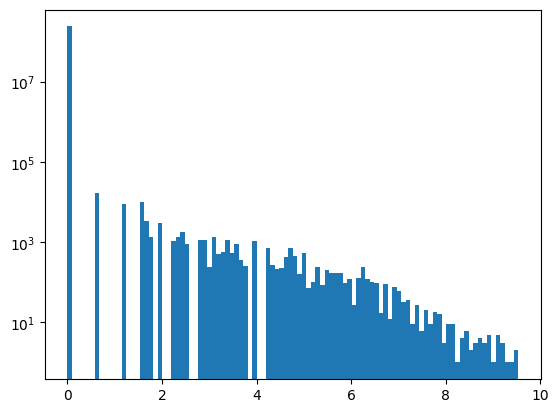

In [8]:
itk = itk.ravel()
print(itk.shape)
plt.figure()
plt.hist(itk, bins=100)
plt.yscale('log')
plt.show()

(140000,)


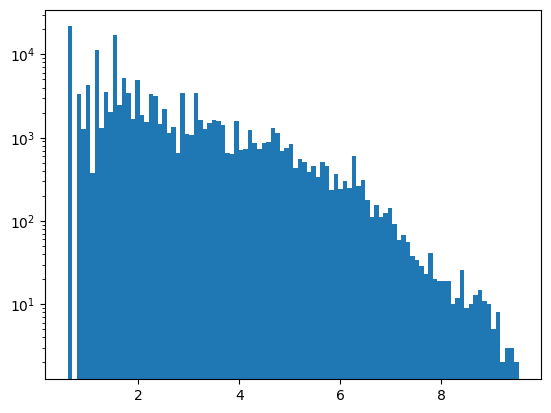

In [23]:
itk = pcd['data'][:, -1].ravel()
print(itk.shape)
plt.figure()  # figsize=(5,10)
plt.hist(itk, bins=100)
plt.yscale('log')
plt.show()

In [24]:

pcdskeleton = f"{data_dir}/SSc_patient_{pat_id}_skeleton_coordinates.pt"
pcd = pd.read_pickle(pcdskeleton)
print(pcd['data'].shape)

(65452, 4)


(65452,)


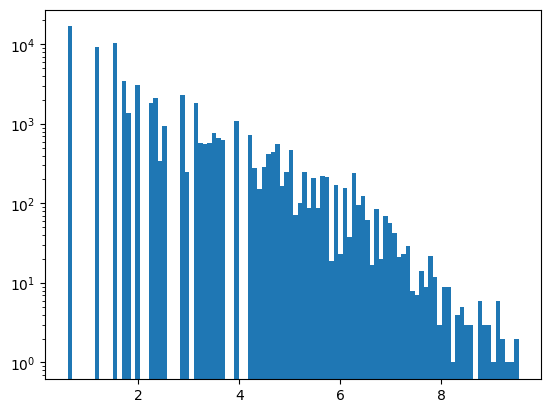

In [25]:
itk = pcd['data'][:, -1].ravel()
print(itk.shape)
plt.figure()  # figsize=(5,10)
plt.hist(itk, bins=100)
plt.yscale('log')
plt.show()

(65452,)
(13090,)


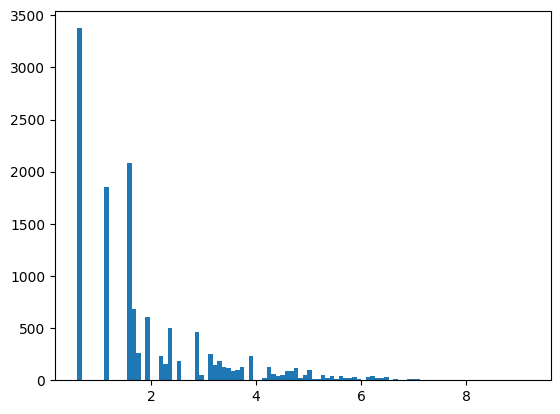

In [35]:

pcdskeleton = f"{data_dir}/SSc_patient_{pat_id}_skeleton_coordinates.pt"
pcd = pd.read_pickle(pcdskeleton)
radius = pcd['data'][:, -1].ravel()
print(radius.shape)

np.random.shuffle(radius)
itk = radius[:len(radius)//5]
print(itk.shape)
plt.figure()  # figsize=(5,10)
plt.hist(itk, bins=100)
# plt.yscale('log')
plt.show()

(255852544,)


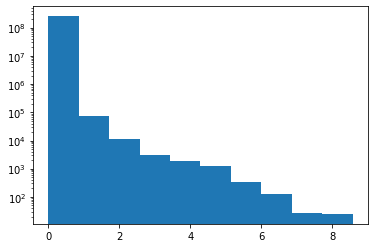

In [6]:
mvl = mvl.ravel()
print(mvl.shape)
plt.figure()
plt.hist(mvl, )
plt.yscale('log')
plt.show()

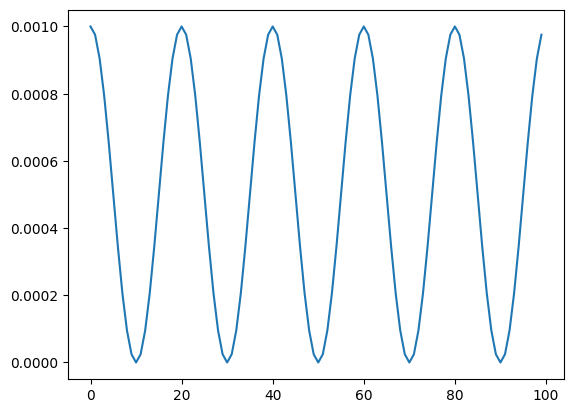

In [2]:
import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)